# Scaling Exercises

In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [ ]:
import wrangle

In [ ]:
train, validate, test = wrangle.wrangle_zillow()
train.shape, validate.shape, test.shape

In [ ]:
train.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

In [ ]:
train[['tax_value','tax_amount']]

In [ ]:
train.tax_amount

### Visualize the originals

In [ ]:
# viz tax amount dist
train.tax_amount.plot.hist()

In [ ]:
# viz tax value dist
train.tax_value.plot.hist()

In [ ]:
# viz together
train.tax_amount.plot.hist()
train.tax_value.plot.hist()

In [ ]:
# scale tax amount and tax value
# 1. create the object
scaler_norm = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler_norm.fit(train[['tax_value', 'tax_amount']])

# 3. use the object (use the min, max to do the transformation)
scaled_tax = scaler_norm.transform(train[['tax_value', 'tax_amount']])
scaled_tax[:10]

In [ ]:
pd.DataFrame(scaled_tax, index=train.index, columns=['scaled_tax_value','scaled_tax_amount'])

In [ ]:
train[['scaled_tax_value','scaled_tax_amount']] = scaled_tax
train.head()

In [ ]:
train.bedrooms.value_counts()

In [ ]:
train.scaled_tax_value.plot.hist()

In [ ]:
train.scaled_tax_amount.plot.hist()

In [ ]:
train.scaled_tax_value.plot.hist(), train.scaled_tax_amount.plot.hist()

## 2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?



In [ ]:
orig_tax = scaler_norm.inverse_transform(scaled_tax)
orig_tax

In [ ]:
inverse_tax = pd.DataFrame(orig_tax, index=train.index, columns=['tax_value','tax_amount'])
inverse_tax

In [ ]:
inverse_tax.tax_value.plot.hist()
inverse_tax.tax_amount.plot.hist()

## 3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [ ]:

qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal', random_state=123)
tax_qt = qt.fit_transform(train[['tax_amount','tax_value']])
tax_qt

In [ ]:
tax_qt = pd.DataFrame(tax_qt, index=train.index, columns=['tax_amount','tax_value'])
tax_qt

In [ ]:
tax_qt.tax_amount.plot.hist()
tax_qt.tax_value.plot.hist()

## 4)Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice

In [ ]:
qt = sklearn.preprocessing.QuantileTransformer(random_state=123)
tax_qt = qt.fit_transform(train[['tax_amount','tax_value']])
tax_qt = pd.DataFrame(tax_qt, index=train.index, columns=['tax_amount','tax_value'])
tax_qt.tax_amount.plot.hist()
tax_qt.tax_value.plot.hist()

## 5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def scale_zillow(train, validate, test):
    '''
    '''
    # scale tax amount and tax value by min-max scaler
    # create the object
    scaler_norm = sklearn.preprocessing.MinMaxScaler()

    # fit the object (learn the min and max value)
    scaler_norm.fit(train[['tax_value', 'tax_amount']])

    # use the object (use the min, max to do the transformation)
    scaled_tax = scaler_norm.transform(train[['tax_value', 'tax_amount']])
    scaled_tax = scaler_norm.transform(validate[['tax_value', 'tax_amount']])
    scaled_tax = scaler_norm.transform(test[['tax_value', 'tax_amount']])
    
    return train, validate, test
    
    

In [2]:
import wrangle

In [3]:
train, validate, test = wrangle.wrangle_zillow()
train.shape, validate.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))

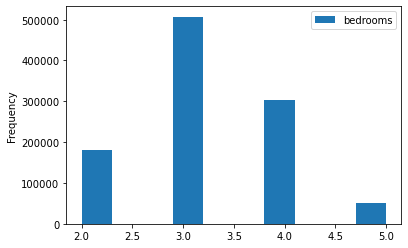

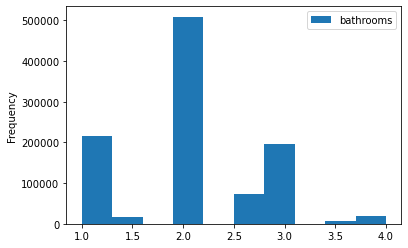

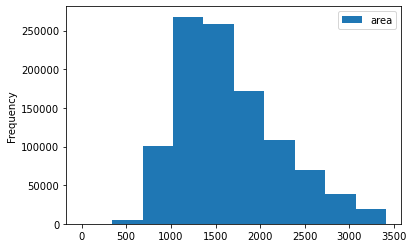

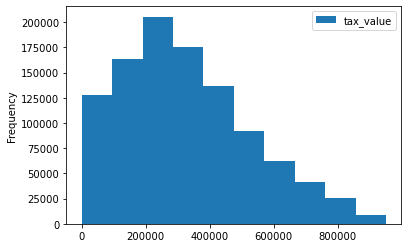

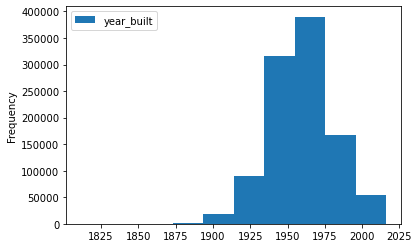

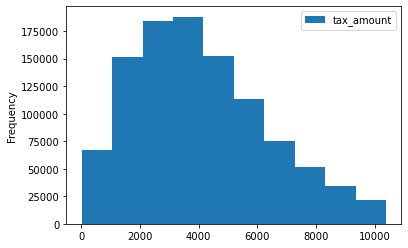

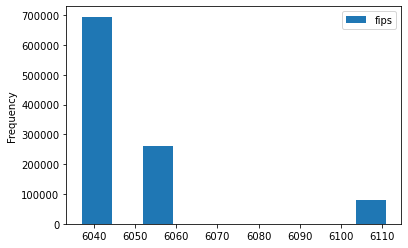

In [4]:
for col in train.columns:
    train[[col]].plot.hist()

<AxesSubplot:ylabel='Frequency'>

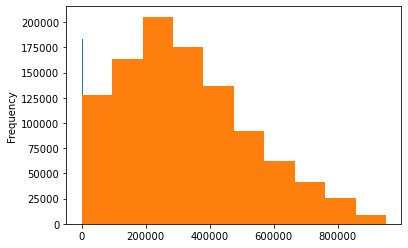

In [5]:
train.tax_amount.plot.hist()
train.tax_value.plot.hist()

In [6]:
import prepare

In [7]:
train, validate, test = prepare.scale_zillow(train, validate, test)
train.shape, validate.shape, test.shape

((1038959, 2), (445269, 2), (371057, 2))

In [8]:
train.tax_amount.plot.hist()
train.tax_value.plot.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'tax_amount'